# Create Ternary Simplex (Triangle) Plot

[`plot_ternary`](../generated/CytoSimplex.plot_ternary) shows cell similarity in a ternary simplex (2-simplex, triangle). The closer a dot, a cell, is to one vertex, the more similar the cell is to the cell cluster(s) the vertex represents. We recommend that users select the top marker genes for each terminal and only use them as the features for calculating the similarity.

/Users/wangych/Library/r-miniconda-arm64/lib/python3.10/site-packages/CytoSimplex/_select_top_features.py:228: RuntimeWarning: invalid value encountered in true_divide
  z = z / usigma


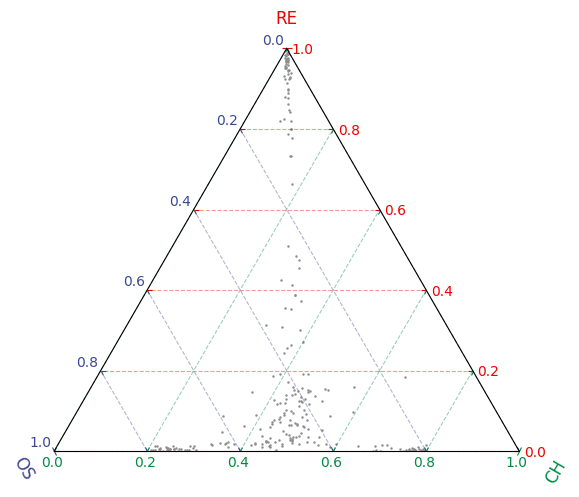

In [1]:
import CytoSimplex as csx
import scanpy as sc
adata = sc.read(filename='test.h5ad',
                backup_url="https://figshare.com/ndownloader/files/41034857")
vertices = {"OS": "Osteoblast_1",
            "RE": "Reticular_1",
            "CH": "Chondrocyte_1"}
selected_genes = csx.select_top_features(adata, cluster_var="cluster", vertices=vertices, n_top=30)
csx.plot_ternary(adata, cluster_var="cluster", vertices=vertices, features=selected_genes)

## Adding velocity information to ternary plot

RNA velocity is a quantitative measurement of cellular transitions from single-cell transcriptomics experiments and 
reveals transient cellular dynamics among a heterogeneous cell population [Qiao et al. PNAS 2021](https://doi.org/10.1073/pnas.2105859118). 
We implemented a velocity visualization strategy that could be applied to ternary and quaternary simplex plot. 
The velocity information input format must be an N x N graph (CSR sparse matrix, where N denotes number of cells). 
We have included a graph that matches with the cells in the example dataset `adata.uns["velo"]`. 
This graph is a matching subset of the output from Python module veloVAE, as part of the processed data from the publication mentioned at home page.

In [2]:
adata.uns["velo"]

<250x250 sparse matrix of type '<class 'numpy.float64'>'
	with 1765 stored elements in Compressed Sparse Row format>

We create a number of square grids in the 2D plain of the ternary simplex (or cube grids in 3D space of the quaternary simplex), 
and aggregate the cells that fall into each grid with taking the mean of velocity towards each of the vertices. 
Finally, we draw an arrow from the grid center pointing to each vertex with the length representing the aggregated mean velocity.

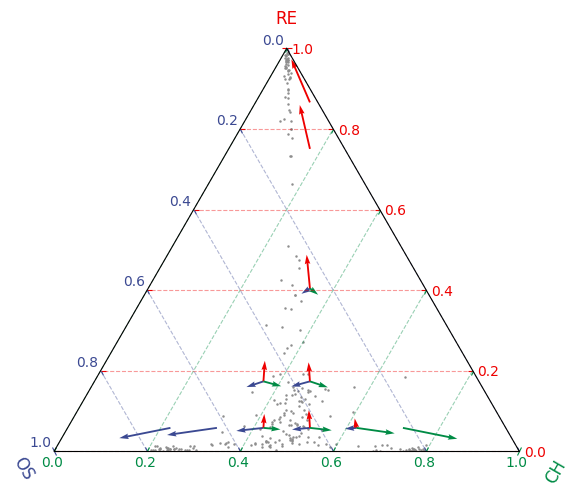

In [3]:
csx.plot_ternary(adata, cluster_var="cluster", vertices=vertices, features=selected_genes, velo_graph="velo")

## Exploration with each cluster

An argument `split_cluster` is supported for all three plotting functions. By setting `split_cluster=True`, we show
the ternary simplex plot of each cluster as specified by `cluster_var`, as well as the ternary simplex plot of the whole dataset.

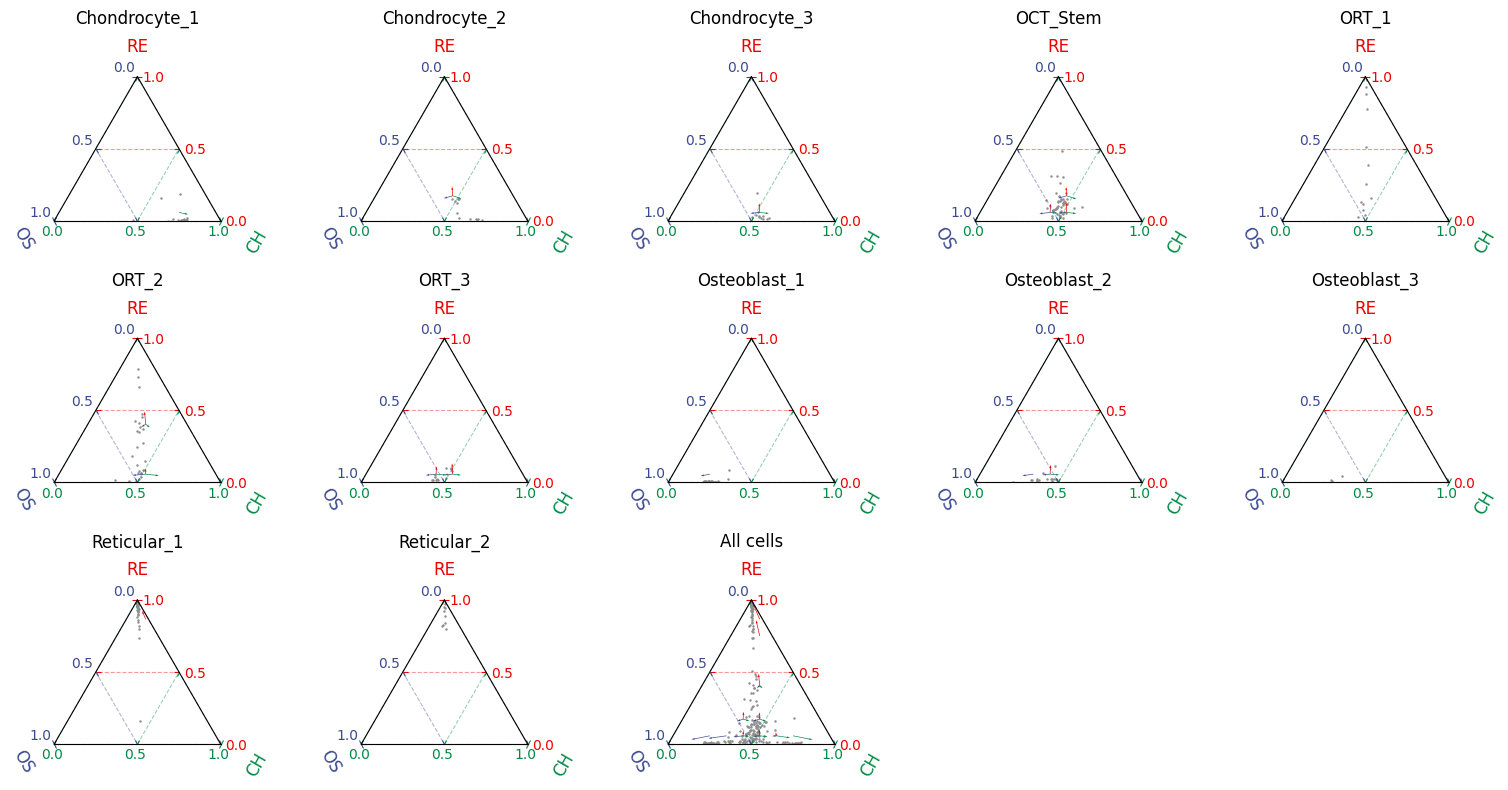

In [4]:
csx.plot_ternary(adata, cluster_var="cluster", vertices=vertices, features=selected_genes, velo_graph="velo", split_cluster=True)

As can be seen in the subplots, osteoblast-chondrocyte transitional (OCT) stem cells ("OCT_Stem") sit in between of "OS" and "CH" and are far away from "RE"; reticular cells ("RE") and osteoblast cells ("OS") are closed to their corresponding vertices; osteoblast-reticular transitional cells ("ORT") distribute across the vertices for the two cell types. These patterns match with the conclusion in the publication.